In [2]:
from drivecycle import route, trajectory, utils, plots, graph, energy

import matplotlib.pyplot as plt
import networkx as nx

import requests
import polyline
import json
import pandas as pd
import numpy as np

import pickle

In [3]:
with open('edges', 'rb') as handle:
    edges = pickle.load(handle)
    
with open('stops', 'rb') as handle:
    stops = pickle.load(handle)

In [4]:
edges


[{'end_node': {'type': 'street_intersection',
   'elapsed_time': 0.698,
   'intersecting_edges': [{'road_class': 'service_other',
     'begin_heading': 204,
     'to_edge_name_consistency': False,
     'from_edge_name_consistency': False}]},
  'length': 0.007,
  'names': ['48 Avenue NW'],
  'speed': 35,
  'way_id': 463682703},
 {'end_node': {'type': 'street_intersection',
   'elapsed_time': 7.607,
   'intersecting_edges': [{'road_class': 'residential',
     'begin_heading': 131,
     'to_edge_name_consistency': False,
     'from_edge_name_consistency': False}]},
  'length': 0.067,
  'names': ['48 Avenue NW'],
  'speed': 35,
  'way_id': 463682703},
 {'end_node': {'type': 'street_intersection',
   'elapsed_time': 23.67,
   'intersecting_edges': [{'road_class': 'residential',
     'begin_heading': 177,
     'to_edge_name_consistency': False,
     'from_edge_name_consistency': False},
    {'road_class': 'residential',
     'begin_heading': 0,
     'to_edge_name_consistency': False,
     'f

In [5]:
data_ = []
for edge in edges:
    length = edge["length"]*1000
    speed = edge["speed"]
    way_id = edge["way_id"]
    try:
        intersect = [edge["end_node"]["intersecting_edges"][0]["road_class"]]
    except:
        intersect = [None]

    item = {
        "way_id":way_id,
        "length":length,
        "speed":speed,
        "intersection":intersect,
    }
    data_.append(item)

In [6]:
len(data_)

347

In [7]:
data_

[{'way_id': 463682703,
  'length': 7.0,
  'speed': 35,
  'intersection': ['service_other']},
 {'way_id': 463682703,
  'length': 67.0,
  'speed': 35,
  'intersection': ['residential']},
 {'way_id': 463682703,
  'length': 156.0,
  'speed': 35,
  'intersection': ['residential']},
 {'way_id': 463682702,
  'length': 44.0,
  'speed': 35,
  'intersection': ['residential']},
 {'way_id': 139293935,
  'length': 130.0,
  'speed': 35,
  'intersection': ['residential']},
 {'way_id': 139293935,
  'length': 144.0,
  'speed': 30,
  'intersection': ['service_other']},
 {'way_id': 139293935,
  'length': 16.0,
  'speed': 30,
  'intersection': ['service_other']},
 {'way_id': 139293935,
  'length': 13.0,
  'speed': 30,
  'intersection': ['residential']},
 {'way_id': 199138512,
  'length': 48.0,
  'speed': 40,
  'intersection': ['service_other']},
 {'way_id': 199138512,
  'length': 50.0,
  'speed': 40,
  'intersection': ['residential']},
 {'way_id': 199138512,
  'length': 49.0,
  'speed': 40,
  'intersectio

In [8]:
a = graph.Graph(data_)
a.include_stops(stops)
a.consolidate_intersections()
a.simplify_graph()

In [10]:
stop={"bus_stop":30,"tertiary":10}
dc = route.sequential(a.get_edges(),stops=stop, stop_at_node=True, step=1)

INFO:root:Could not complete segment: ti: 1174.00, tf: 4.91,  vi: 13.89 , vf: 0.00,                                 v_target:13.89, length: 68.20
INFO:root:Could not complete segment: ti: 1209.91, tf: 3.61,  vi: 13.89 , vf: 0.00,                                 v_target:13.89, length: 50.20
INFO:root:Vi: 11.11. Reducing vf to 12.25 and v_target to 12.25 at time 1585.5248000000001 and segment length 25.0
INFO:root:Could not complete segment: ti: 1744.52, tf: 6.60,  vi: 13.61 , vf: 0.00,                                 v_target:13.61, length: 89.80
INFO:root:Vi: 0.00. Reducing vf to 12.25 and v_target to 12.25 at time 1773.1223510204084 and segment length 59.20000000000073
INFO:root:Vi: 0.00. Reducing vf to 11.03 and v_target to 11.03 at time 1773.1223510204084 and segment length 59.20000000000073
INFO:root:Vi: 0.00. Reducing vf to 9.92 and v_target to 9.92 at time 1773.1223510204084 and segment length 59.20000000000073
INFO:root:Could not complete segment: ti: 1905.12, tf: 5.36,  vi: 13

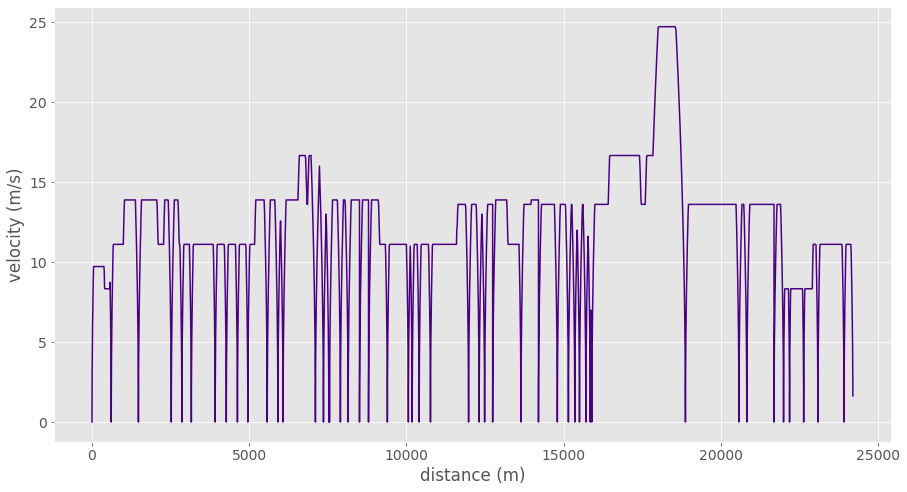

In [11]:
plots.plot_vd(dc,"route_drivecycle.png")

In [12]:
len(a.get_edges())

120

In [13]:
dc

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 5.00000000e-01],
       [2.00000000e+00, 2.00000000e+00, 2.00000000e+00],
       ...,
       [3.11593874e+03, 3.63511111e+00, 2.41946500e+04],
       [3.11693874e+03, 2.63511111e+00, 2.41977851e+04],
       [3.11793874e+03, 1.63511111e+00, 2.41999202e+04]])

In [21]:
power = energy.energy_model(dc,m=15000, area=8.5, capacity=555)


final = np.c_[dc, power[:,4]]

In [33]:
np.round(np.average(final[:,1]),2)
power[-1,4]

0.9485649096306077

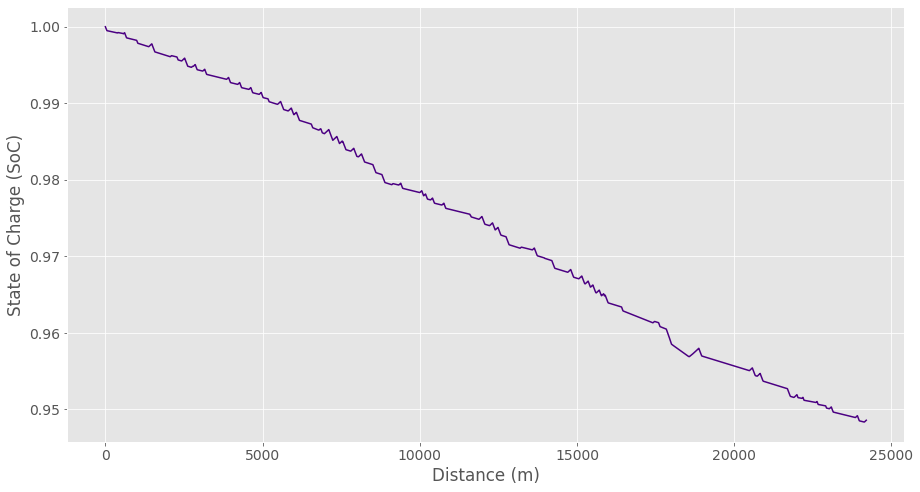

SoC: 0.9485649096306077


In [24]:
t=[i[2] for i in final]
p=[i[3] for i in final]

plt.figure(figsize=(15, 8))
plt.plot(t,p, color='#4b0082', linewidth=1.5)
plt.rcParams['savefig.facecolor'] = 'white'
plt.rcParams.update({'font.size': 14})
plt.xlabel("Distance (m)")
plt.ylabel("State of Charge (SoC)")
plt.savefig("Soc_chart.png", transparent=False, bbox_inches='tight')
plt.show()

print(f"SoC: {power[-1,4]}")

<Figure size 432x288 with 0 Axes>